In [1]:
from AbAffinity import AbAffinity 

In [2]:
#### Load Model 
model = AbAffinity() 

### Make scFv sequence 

The model takes complete scFv sequences as input. Heavy and Light chain are connected with a linker sequence. Use `make_scFv()` method from the model to get the complete scFv seqeunce from heavy chain and light chain sequence.

In [3]:
heavy_seq = 'EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLEWMGWISAYNGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCARVGRGVIDHWGQGTLVTVSS' 
light_seq = 'SSELTQDPAVSVALGQTVRITCEGDSLDYYYANWYQQKPGQAPILVIYGKNNRPSGIADRFSGSNSGDTSSLIITGAQAEDEADYYCSSRDSSGFEVTFGAGTKLTVL'

scFv_seq = model.make_scFv(heavy_seq, light_seq) 
print(scFv_seq)  

EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLEWMGWISAYNGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCARVGRGVIDHWGQGTLVTVSSGGGGSGGGGSGGGGSSSELTQDPAVSVALGQTVRITCEGDSLDYYYANWYQQKPGQAPILVIYGKNNRPSGIADRFSGSNSGDTSSLIITGAQAEDEADYYCSSRDSSGFEVTFGAGTKLTVL


### Predict Binding Affinity 

Use `get_affinity()` method to get the predicted binding affinity of the antibody sequence. 

You can pass a list of sequences to get embeddings for all. Make sure that you have enough memory to process the sequences altogether. You can tune the batch size for this purpose. Example: `model.get_affinity(list_sequences, batch_size=16)`. Default batch_size is 4. 

In [4]:
model.get_affinity(scFv_seq)

tensor([3.1595])

### Get Embeddings  

Use `get_embeddings()` method to get the embeddings for input sequences. Use `mode='res'` to get residue wise embeddings, and `mode='seq'` will give seqeunce embedding.

You can pass a list of sequences to get embeddings for all. Make sure that you have enough memory to process the sequences altogether. You can tune the batch size for this purpose. Example: `model.get_embeddings(list_sequences, mode='seq', batch_size=16)`. Default batch_size is 4.

In [5]:
res_emb = model.get_embeddings(scFv_seq, mode='res')
print(res_emb.shape)

torch.Size([258, 1280])


In [6]:
seq_emb = model.get_embeddings(scFv_seq, mode='seq')
print(seq_emb.shape)

torch.Size([1280])


### Get Contact Maps 

Use  `get_contact_map()` method to get the contact maps of the given antibody sequence. It will return a matrix of shape `L x L` where `L` is the length of input sequence. Each value in the matrix represents the contact weight between two residue in the sequence. 

Use `mode='VH-VL'` if you want to plot the contacts for heavy chain and light chain separately, and `mode='scFv'` to plot single contacts for the entire scFv sequence. 



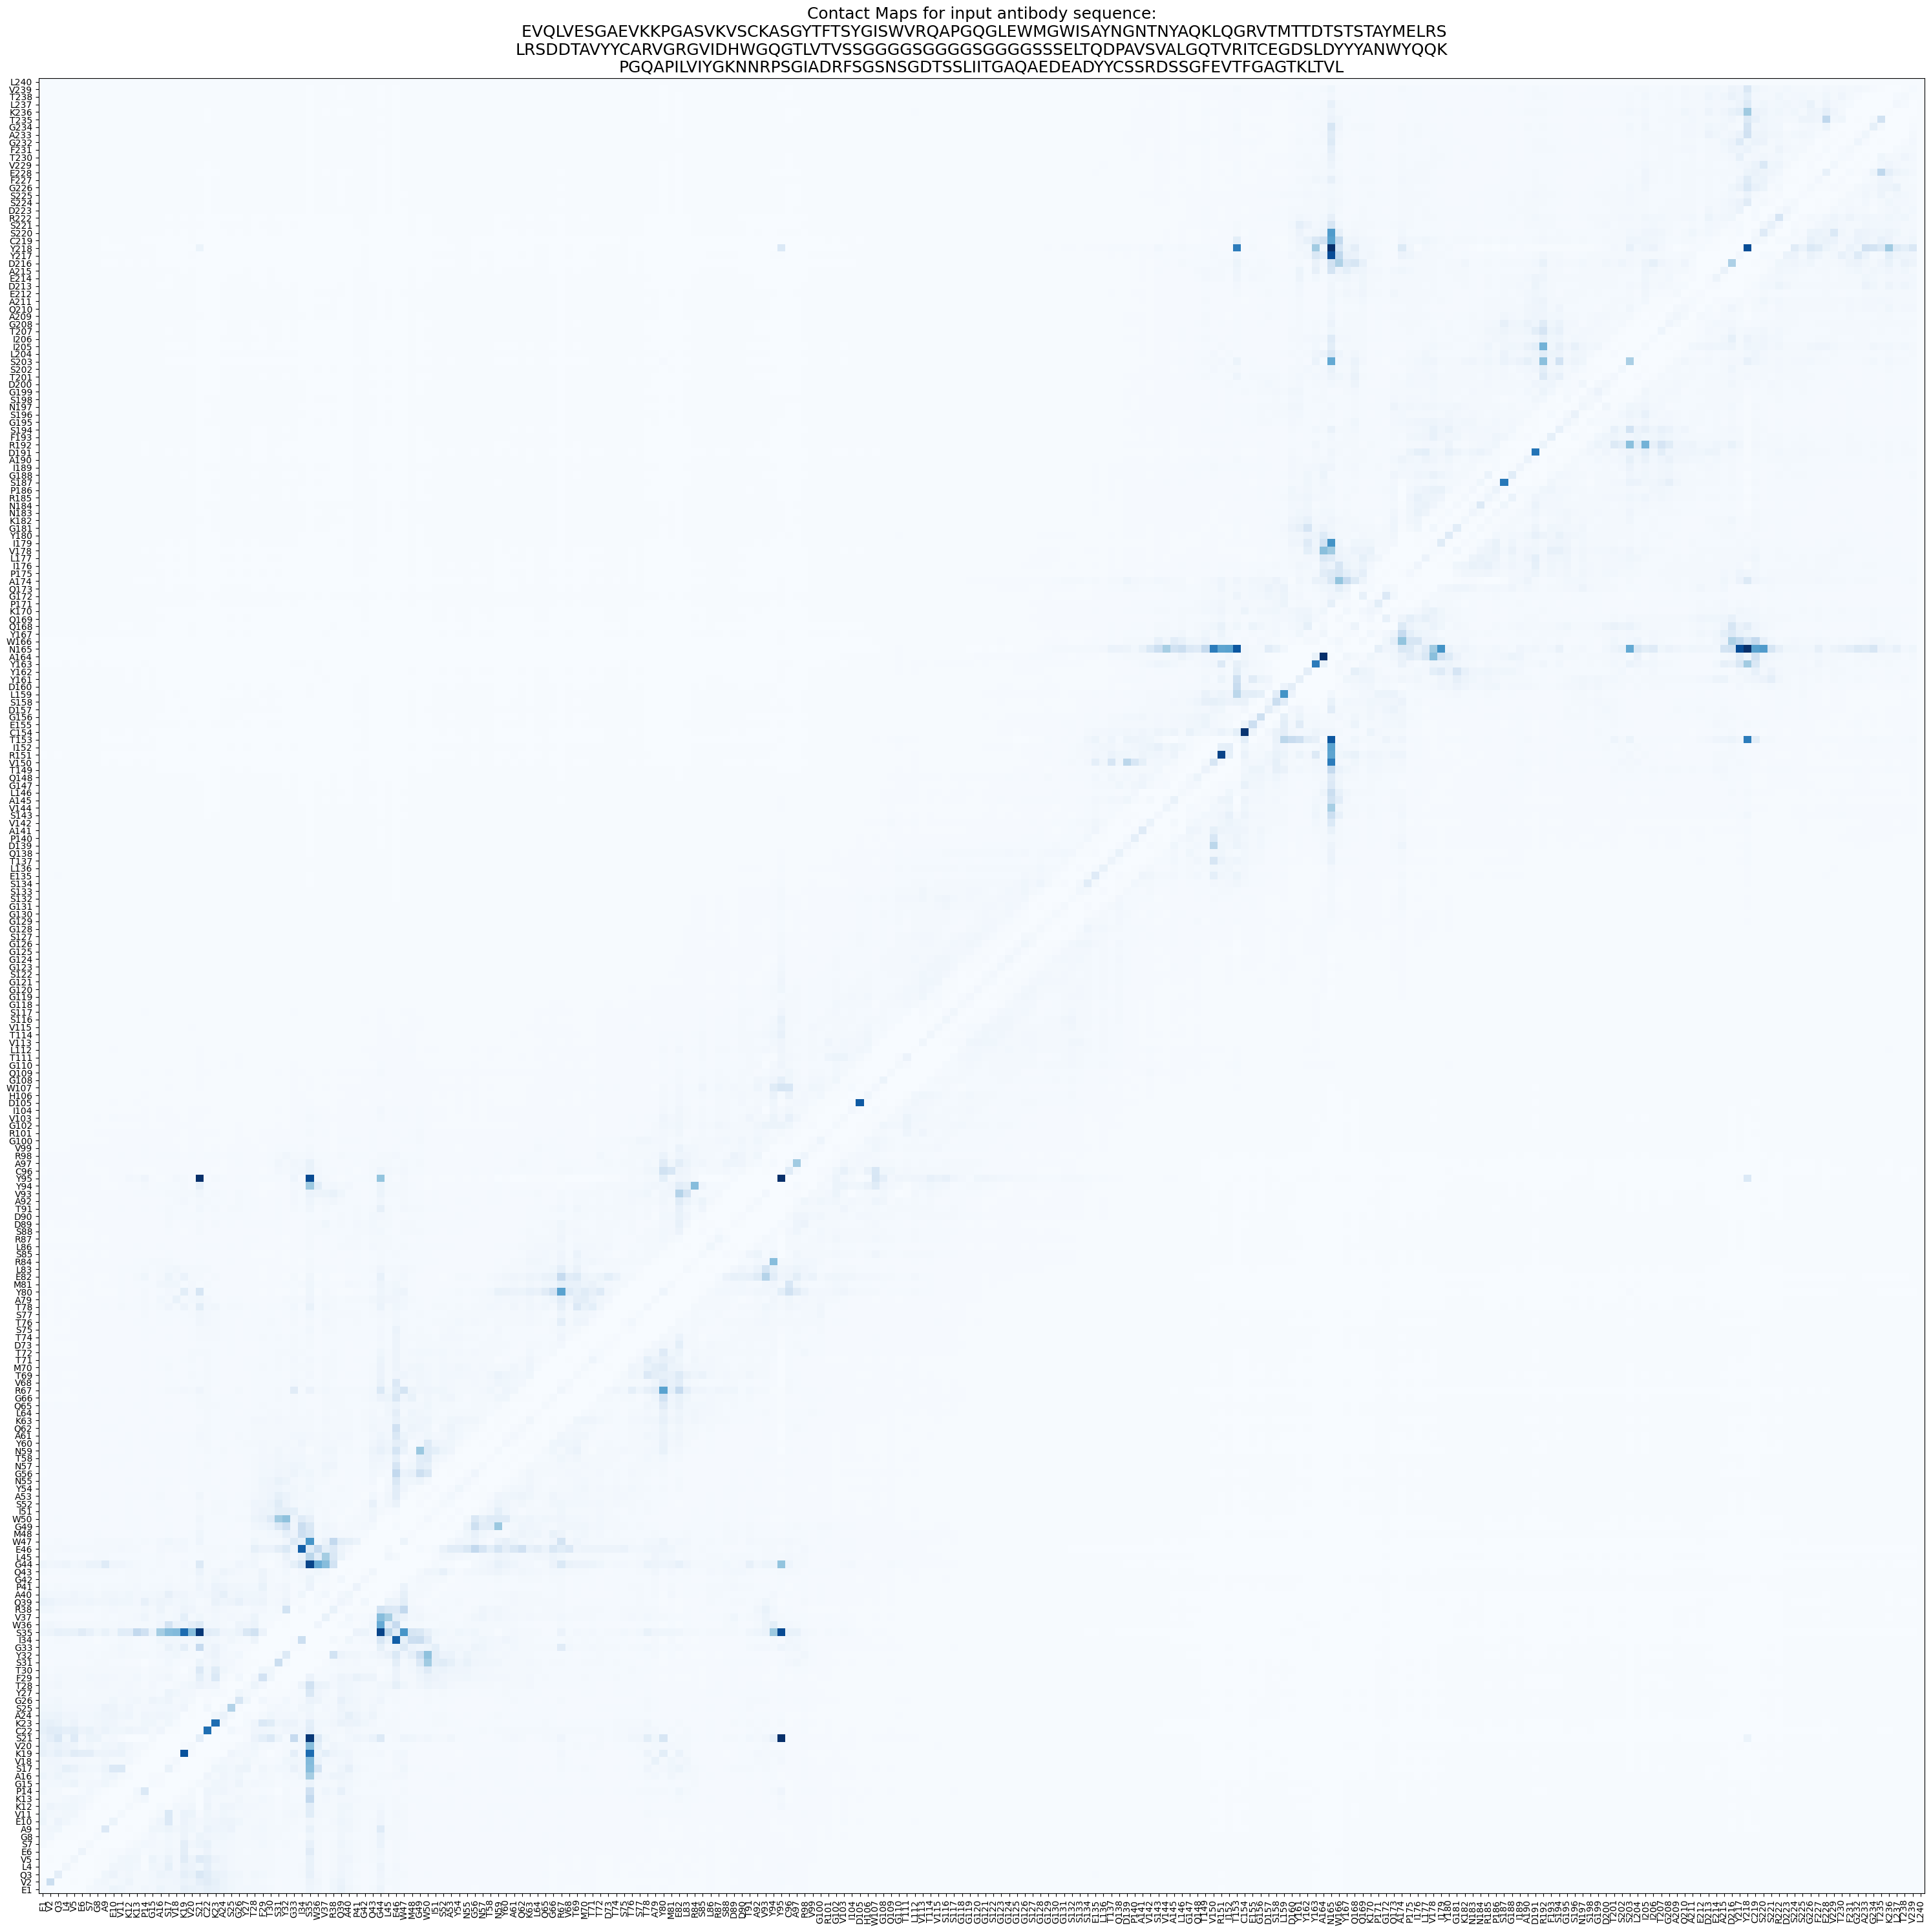

(240, 240)


In [7]:
contacts = model.get_contact_map(scFv_seq, mode = 'scFv')
print(contacts.shape)

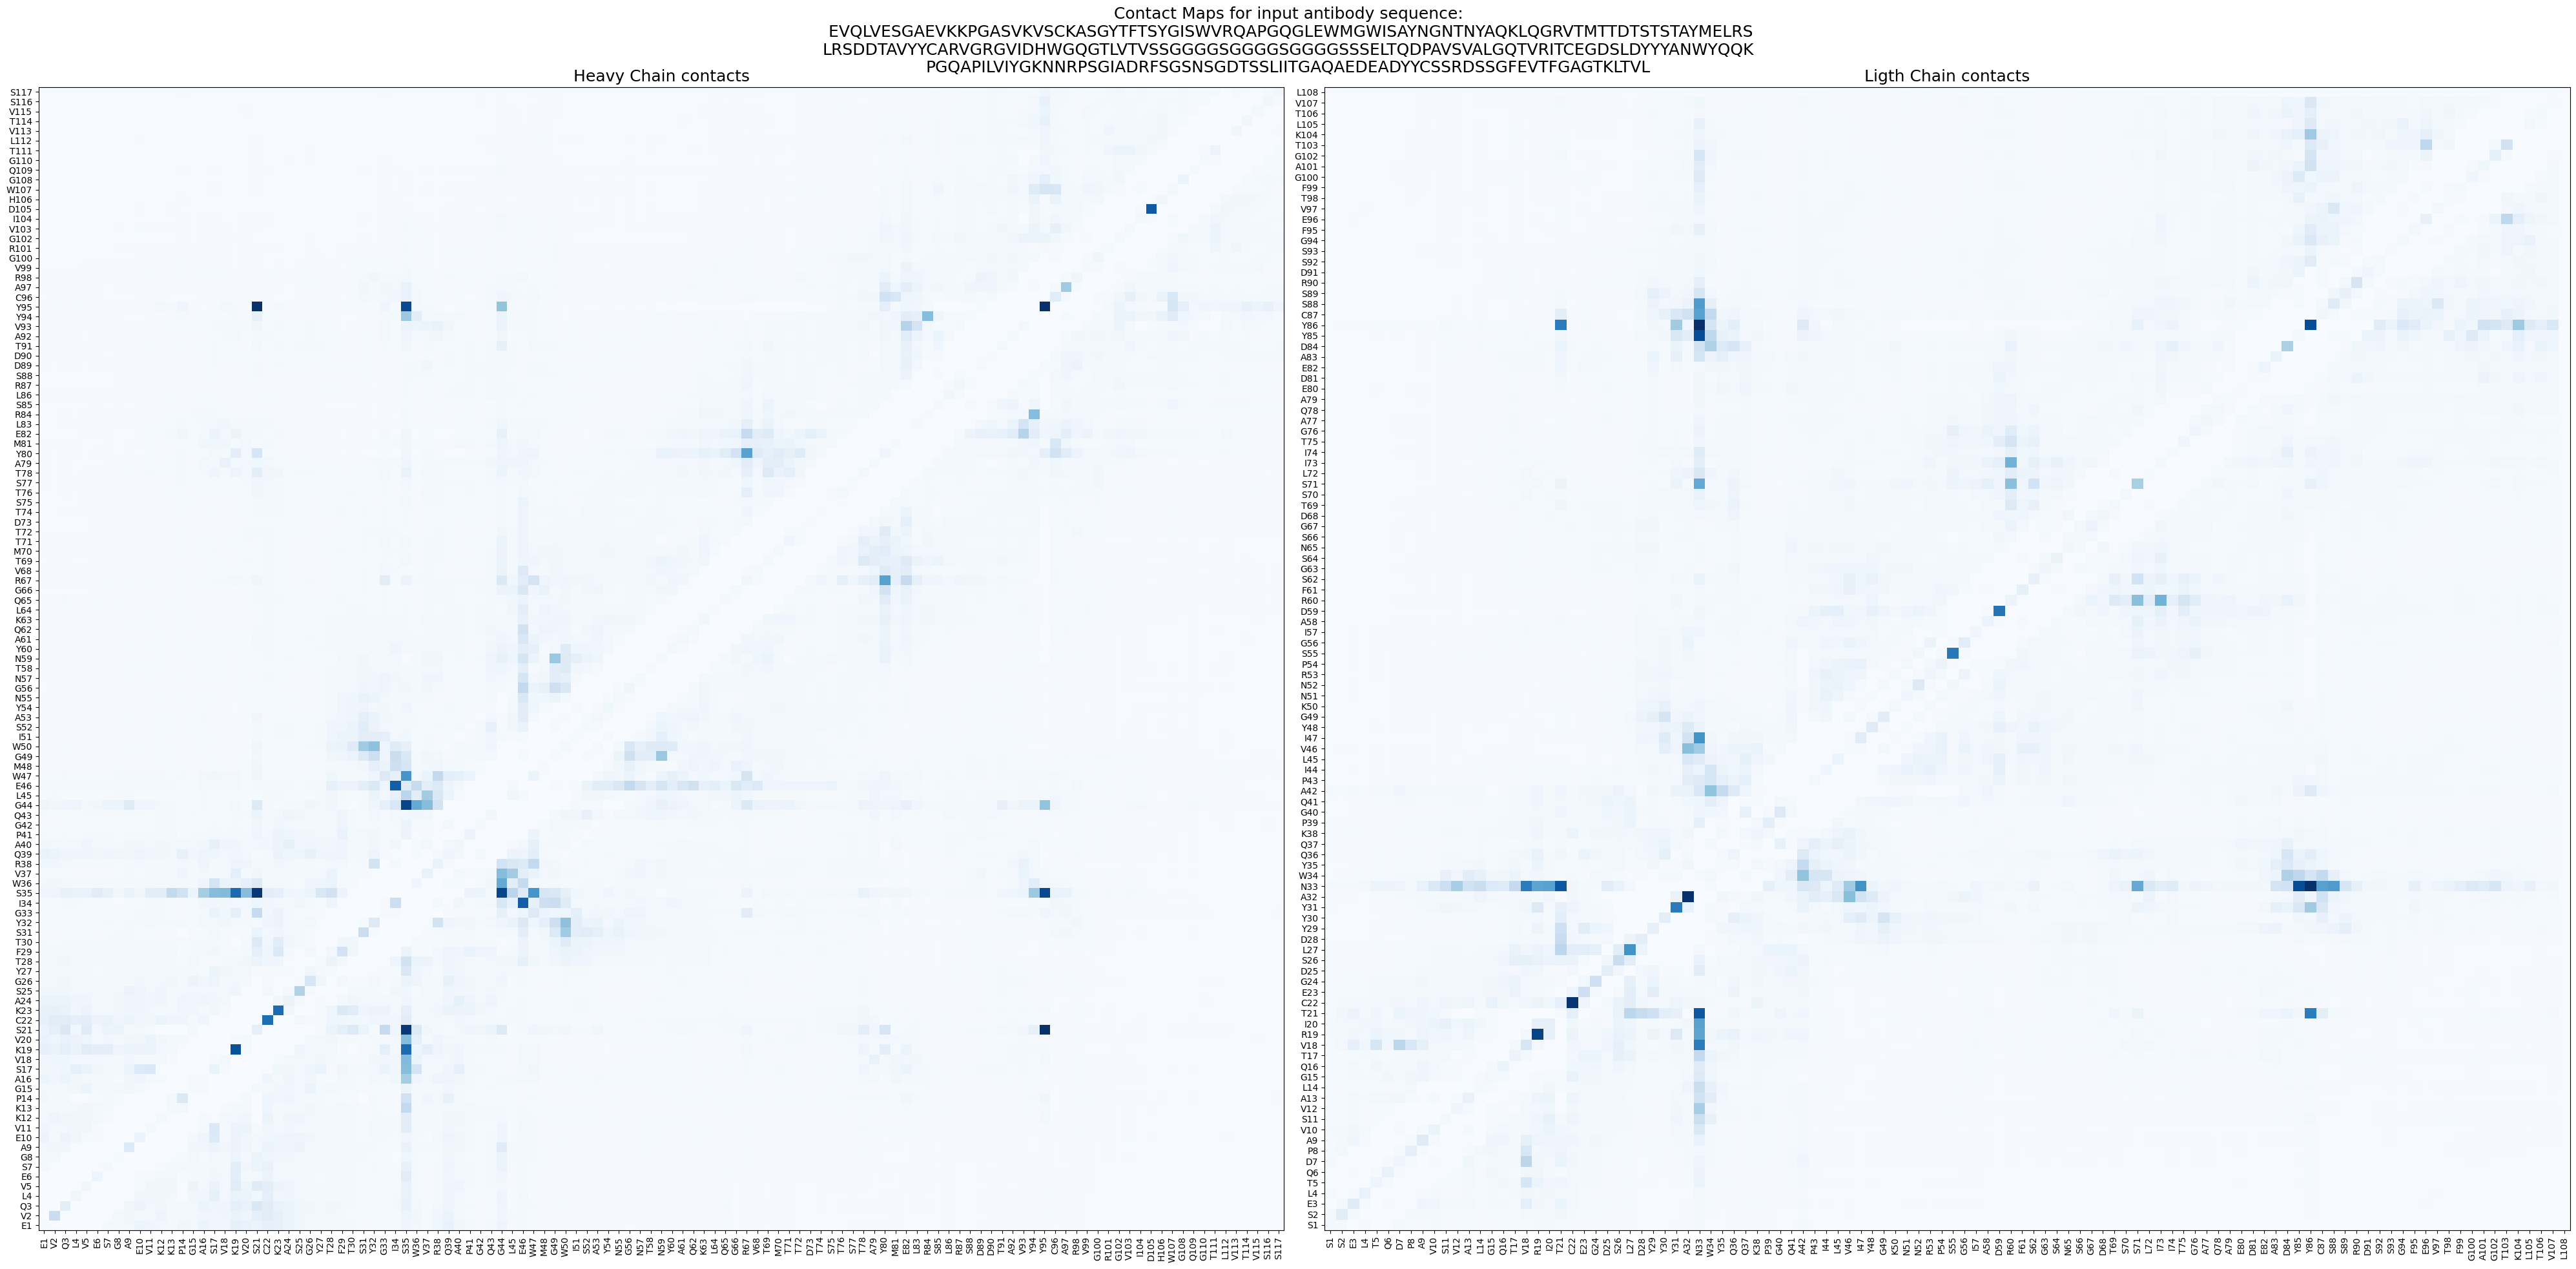

(240, 240)


In [8]:
contacts = model.get_contact_map(scFv_seq, mode = 'VH-VL')
print(contacts.shape)